In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import time


In [ ]:
data = pd.read_csv('/content/US Airline Flight Routes and Fares.csv')
data

<ipython-input-4-855c0fe6b379>:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/US Airline Flight Routes and Fares.csv')


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,245955.0,2008.524124,8.703364,1993.0000,2001.000,2008.0000,2016.0000,2024.0
quarter,245955.0,2.479153,1.122149,1.0000,1.000,2.0000,3.0000,4.0
citymarketid_1,245955.0,31556.430201,1089.872880,30135.0000,30721.000,31423.0000,32467.0000,35412.0
citymarketid_2,245955.0,32180.117086,1232.464184,30189.0000,30994.000,32211.0000,33192.0000,35628.0
airportid_1,245955.0,12437.099986,1431.665257,10135.0000,11193.000,12266.0000,13487.0000,16440.0
airportid_2,245955.0,13249.889525,1425.810159,10466.0000,12197.000,13303.0000,14679.0000,15919.0
nsmiles,245955.0,1189.812319,703.143472,109.0000,626.000,1023.0000,1736.0000,2724.0
passengers,245955.0,299.476795,511.389486,0.0000,21.000,113.0000,339.0000,8301.0
fare,245955.0,218.979587,82.372486,50.0000,164.620,209.3200,262.8900,3377.0
large_ms,244415.0,0.665252,0.224635,0.0038,0.480,0.6524,0.8719,1.0


In [ ]:
data.isnull().sum()

,0
tbl,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
city1,0
city2,0
airportid_1,0
airportid_2,0
airport_1,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.nunique()

,0
tbl,2
Year,31
quarter,4
citymarketid_1,141
citymarketid_2,128
city1,141
city2,128
airportid_1,188
airportid_2,173
airport_1,187


In [ ]:
data.shape

(245955, 23)

In [ ]:
x=data.drop(['fare','city1','city2','tbl','tbl1apk','airport_1','airport_2','carrier_lg','carrier_low','Geocoded_City1','Geocoded_City2'],axis=1)
y=data['fare']

In [ ]:
y.head()

,fare
0,81.43
1,208.93
2,184.56
3,182.64
4,177.11


In [ ]:
x.head()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,large_ms,fare_lg,lf_ms,fare_low
0,2021,3,30135,33195,10135,14112,970,180,1.0000,81.43,1.0000,81.43
1,2021,3,30135,33195,10135,15304,970,19,0.4659,219.98,0.1193,154.11
2,2021,3,30140,30194,10140,11259,580,204,0.9968,184.44,0.9968,184.44
3,2021,3,30140,30194,10140,11298,580,264,0.9774,183.09,0.9774,183.09
4,2021,3,30140,30466,10140,14107,328,398,0.6061,184.49,0.3939,165.77


In [ ]:
x.isnull().sum()

,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
airportid_1,0
airportid_2,0
nsmiles,0
passengers,0
large_ms,1540
fare_lg,1540


In [ ]:
x.fillna(x.mean(),inplace=True)

In [ ]:
x.isnull().sum()

,0
Year,0
quarter,0
citymarketid_1,0
citymarketid_2,0
airportid_1,0
airportid_2,0
nsmiles,0
passengers,0
large_ms,0
fare_lg,0


#Scaling

In [ ]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
x_scaled

array([[ 1.43345727,  0.46415255, -1.30421916, ..., -1.62638428,
         1.65742344, -1.48966254],
       [ 1.43345727,  0.46415255, -1.30421916, ...,  0.01503444,
        -0.99867638, -0.49860809],
       [ 1.43345727,  0.46415255, -1.29963146, ..., -0.40601227,
         1.64777257, -0.0850324 ],
       ...,
       [ 1.77815225, -1.31814541,  3.53763976, ...,  1.22273003,
         1.0714348 ,  1.7896259 ],
       [ 1.77815225, -1.31814541,  3.53763976, ..., -1.45791821,
         1.65742344, -1.29576058],
       [ 1.77815225, -1.31814541,  3.53763976, ...,  0.82537757,
         0.21341232,  1.33227909]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

#Linear reggression

In [ ]:
lr = LinearRegression()
st=time.time()
lr.fit(x_train,y_train)
et=time.time()

In [ ]:
yp=lr.predict(x_test)

In [ ]:
ltt=et-st
mse_linear = mean_squared_error(y_test, yp)
r2_linear = r2_score(y_test, yp)
mae_linear = mean_absolute_error(y_test, yp)
rmse_linear = np.sqrt(mse_linear)

print('Training time : ',ltt)
print('Mean Squared Error (MSE):', mse_linear)
print('R² Score:', r2_linear)
print('Mean Absolute Error (MAE):', mae_linear)
print('Root Mean Squared Error (RMSE):', rmse_linear)


Training time :  0.1149754524230957
Mean Squared Error (MSE): 855.4764901442774
R² Score: 0.8707179152659199
Mean Absolute Error (MAE): 11.927279594342444
Root Mean Squared Error (RMSE): 29.24852970910294


In [ ]:
# prompt: make a data frame for above traing time mse r2mae rmse

import pandas as pd

data = {'Model': ['Linear Regression'],
        'Training Time': [ltt],
        'MSE': [mse_linear],
        'R2': [r2_linear],
        'MAE': [mae_linear],
        'RMSE': [rmse_linear]}

results_df = pd.DataFrame(data)
results_df

,Model,Training Time,MSE,R2,MAE,RMSE
0,Linear Regression,0.114975,855.47649,0.870718,11.92728,29.24853


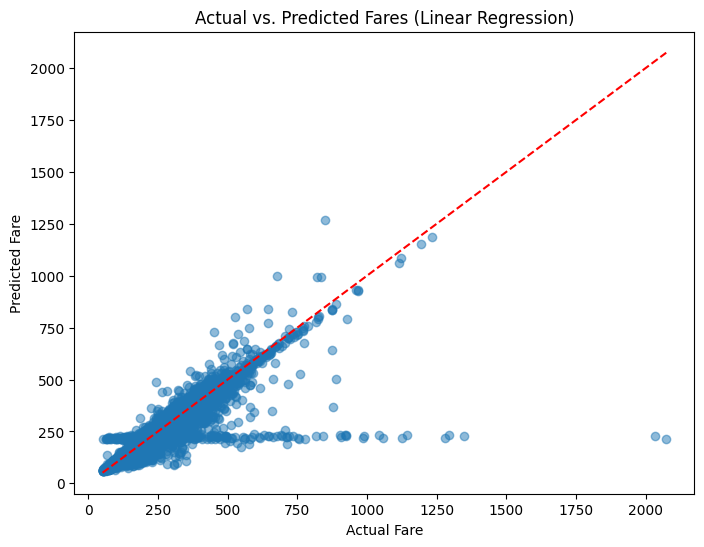

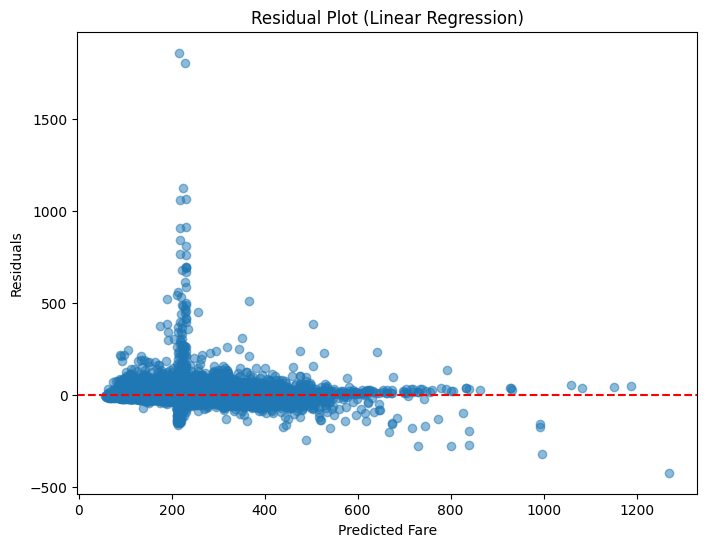

<ipython-input-46-979897d87683>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)  # You might need to install seaborn: !pip install seaborn


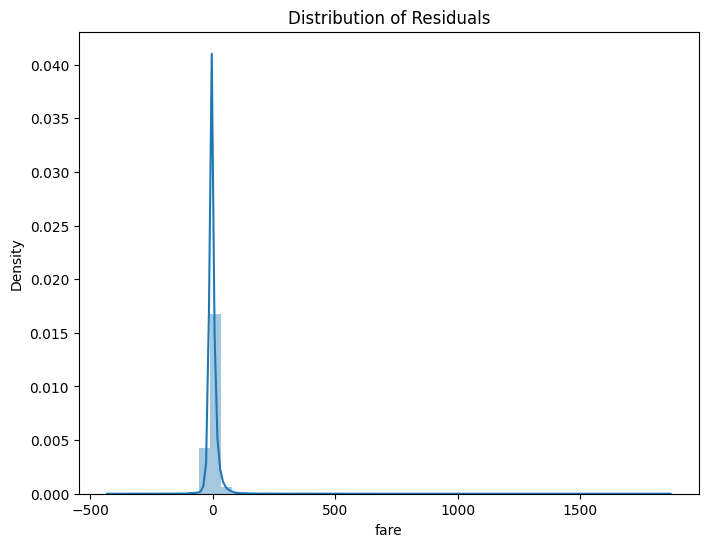

In [ ]:
# prompt: graphs for linear regression

import matplotlib.pyplot as plt

# Assuming 'yp' contains your predicted values and 'y_test' contains your actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yp, alpha=0.5)  # Use alpha for better visualization if many points overlap
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs. Predicted Fares (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()


# Residual Plot
residuals = y_test - yp
plt.figure(figsize=(8, 6))
plt.scatter(yp, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()


# Distribution of Residuals (optional)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(residuals)  # You might need to install seaborn: !pip install seaborn
plt.title("Distribution of Residuals")
plt.show()

#Lasso regression

In [ ]:
las = Lasso()
st=time.time()
las.fit(x_train,y_train)
et=time.time()

In [ ]:
yp_lasso = las.predict(x_test)

In [ ]:
lasso_tt=et-st
mse_lasso = mean_squared_error(y_test, yp_lasso)
r2_lasso = r2_score(y_test, yp_lasso)
mae_lasso = mean_absolute_error(y_test, yp_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print('Training time : ',lasso_tt)
print('Mean Squared Error (MSE) for Lasso:', mse_lasso)
print('R² Score for Lasso:', r2_lasso)
print('Mean Absolute Error (MAE) for Lasso:', mae_lasso)
print('Root Mean Squared Error (RMSE) for Lasso:', rmse_lasso)


Training time :  0.16004610061645508
Mean Squared Error (MSE) for Lasso: 859.2842349682691
R² Score for Lasso: 0.8701424778405173
Mean Absolute Error (MAE) for Lasso: 12.1060272071029
Root Mean Squared Error (RMSE) for Lasso: 29.31355036443503


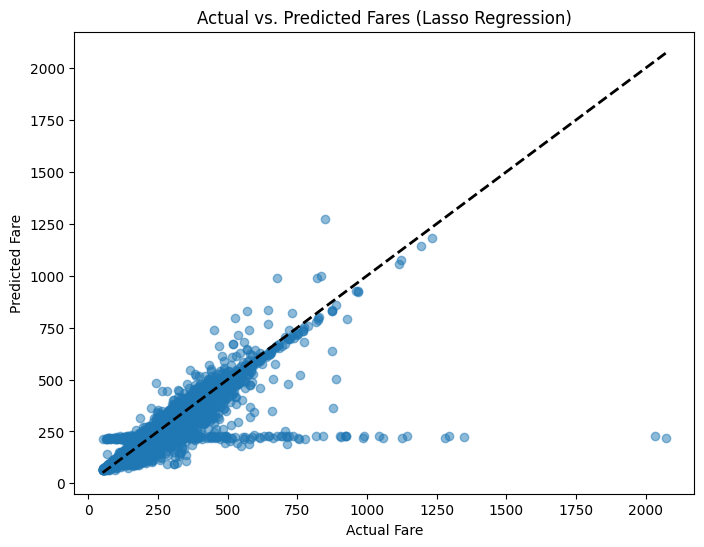

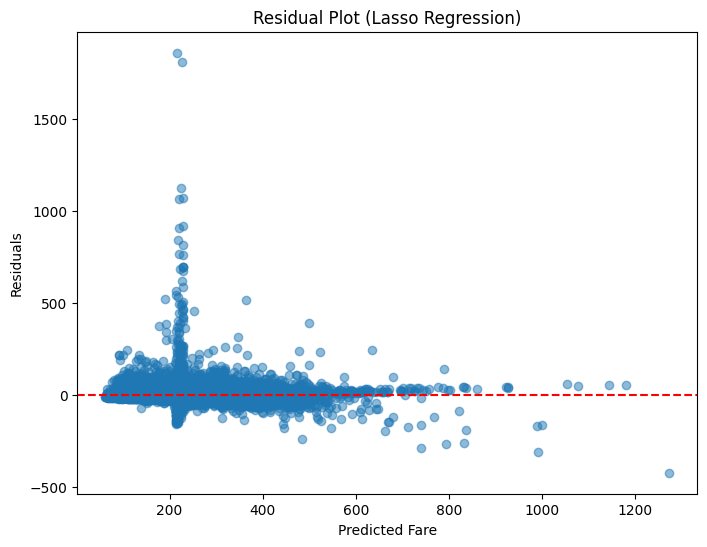

<ipython-input-50-e0a66c5bcf7b>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_lasso)  # You might need to install seaborn: !pip install seaborn


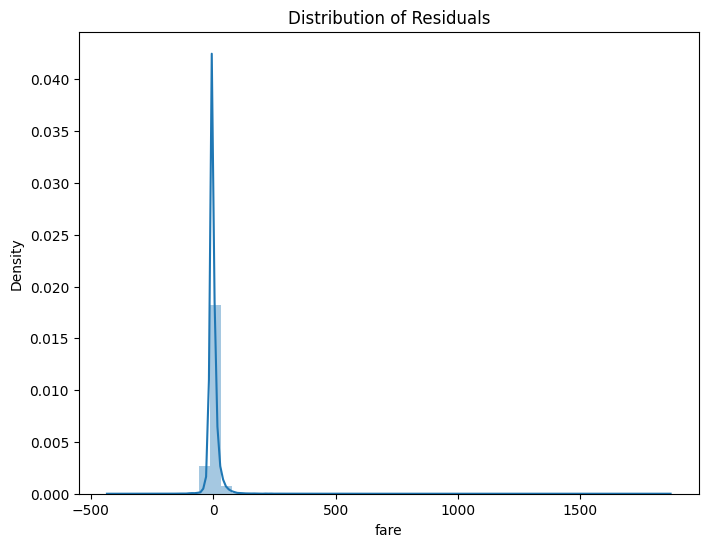

In [ ]:
# prompt: graphs for lasso regression

import matplotlib.pyplot as plt

# Actual vs Predicted values for Lasso Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yp_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fares (Lasso Regression)')
plt.show()

# Residual plot for Lasso Regression
residuals_lasso = y_test - yp_lasso
plt.figure(figsize=(8, 6))
plt.scatter(yp_lasso, residuals_lasso, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot (Lasso Regression)')
plt.show()


import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(residuals_lasso)  # You might need to install seaborn: !pip install seaborn
plt.title("Distribution of Residuals")
plt.show()

#Ridge Regression

In [ ]:
RR = Ridge()
st=time.time()
RR.fit(x_train,y_train)
et=time.time()

In [ ]:
yp_ridge=RR.predict(x_test)

In [ ]:
RR_tt=et-st
mse_ridge = mean_squared_error(y_test, yp_ridge)
r2_ridge = r2_score(y_test, yp_ridge)
mae_ridge = mean_absolute_error(y_test, yp_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print('Training time : ',RR_tt)
print('Mean Squared Error (MSE) for Ridge:', mse_ridge)
print('R² Score for Ridge:', r2_ridge)
print('Mean Absolute Error (MAE) for Ridge:', mae_ridge)
print('Root Mean Squared Error (RMSE) for Ridge:', rmse_ridge)


Training time :  0.040175676345825195
Mean Squared Error (MSE) for Ridge: 855.4763687424337
R² Score for Ridge: 0.8707179336125181
Mean Absolute Error (MAE) for Ridge: 11.927330833697848
Root Mean Squared Error (RMSE) for Ridge: 29.248527633753355


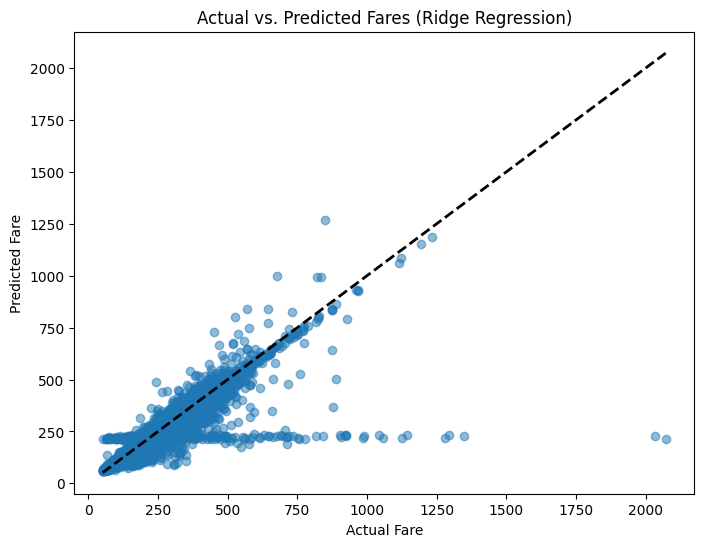

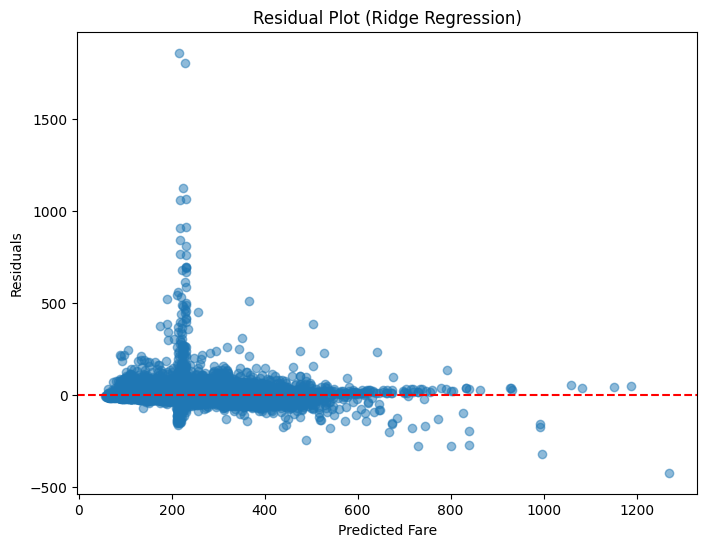

<ipython-input-54-c48da71c59ce>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_ridge)  # You might need to install seaborn: !pip install seaborn


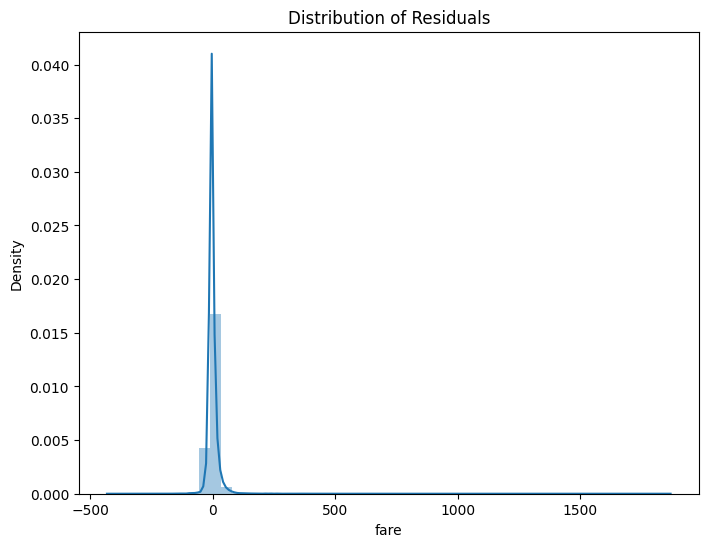

In [ ]:
# prompt: make e graphs for ridge regression

# Actual vs Predicted values for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yp_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fares (Ridge Regression)')
plt.show()

# Residual plot for Ridge Regression
residuals_ridge = y_test - yp_ridge
plt.figure(figsize=(8, 6))
plt.scatter(yp_ridge, residuals_ridge, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.show()

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(residuals_ridge)  # You might need to install seaborn: !pip install seaborn
plt.title("Distribution of Residuals")
plt.show()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
st=time.time()
knn_regressor.fit(x_train, y_train)
et=time.time()

In [ ]:
yp_knn=knn_regressor.predict(x_test)

In [ ]:
knn_tt=et-st
mse_knn = mean_squared_error(y_test, yp_knn)
r2_knn = r2_score(y_test, yp_knn)
mae_knn = mean_absolute_error(y_test, yp_knn)
rmse_knn = np.sqrt(mse_knn)

print('Training time : ',knn_tt)
print('Mean Squared Error (MSE) for KNN:', mse_knn)
print('R² Score for KNN:', r2_knn)
print('Mean Absolute Error (MAE) for KNN:', mae_knn)
print('Root Mean Squared Error (RMSE) for KNN:', rmse_knn)


Training time :  0.6491265296936035
Mean Squared Error (MSE) for KNN: 886.361582161615
R² Score for KNN: 0.8660504707140166
Mean Absolute Error (MAE) for KNN: 13.441943688886179
Root Mean Squared Error (RMSE) for KNN: 29.771825307858016


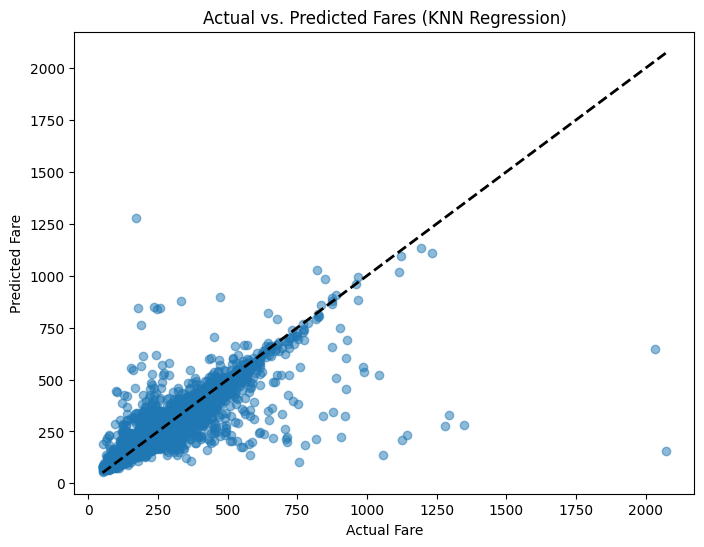

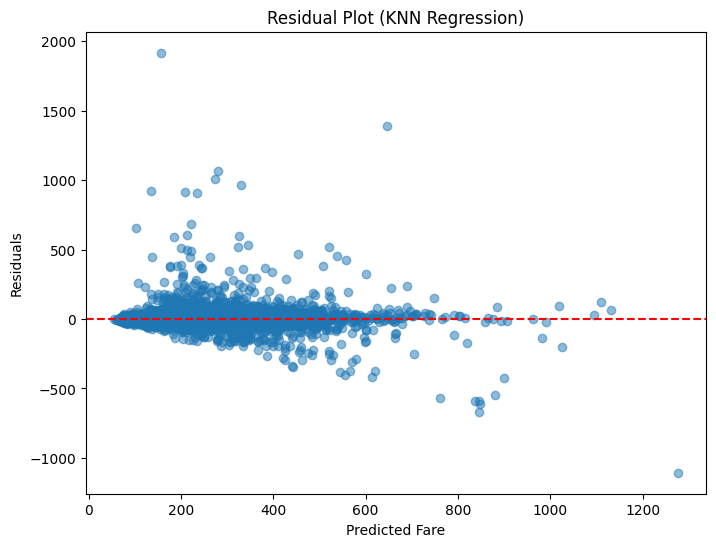

<ipython-input-59-9db6cf29436e>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_ridge)  # You might need to install seaborn: !pip install seaborn


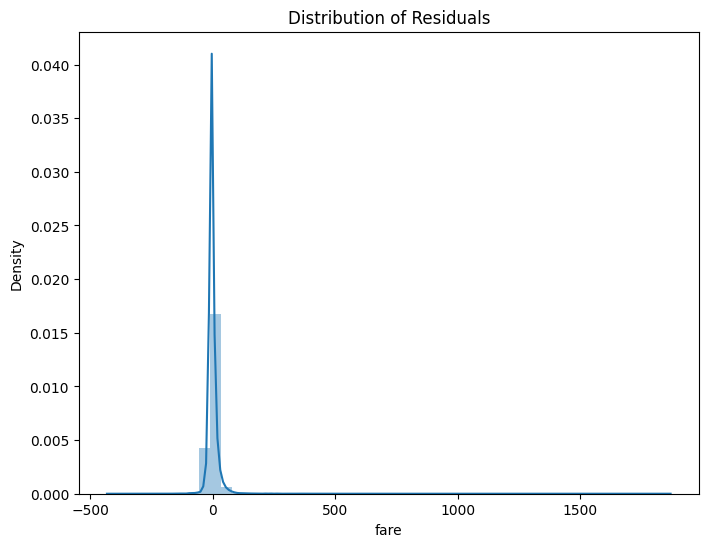

In [ ]:
# prompt: make e graphs for ridge regression

# Actual vs Predicted values for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yp_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fares (KNN Regression)')
plt.show()

# Residual plot for Ridge Regression
residuals_knn = y_test - yp_knn
plt.figure(figsize=(8, 6))
plt.scatter(yp_knn, residuals_knn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot (KNN Regression)')
plt.show()

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(residuals_ridge)  # You might need to install seaborn: !pip install seaborn
plt.title("Distribution of Residuals")
plt.show()

#DT

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
st = time.time()
dt_regressor.fit(x_train, y_train)
et = time.time()

In [ ]:
yp_dt = dt_regressor.predict(x_test)

In [ ]:
dt_tt = et - st
mse_dt = mean_squared_error(y_test, yp_dt)
r2_dt = r2_score(y_test, yp_dt)
mae_dt = mean_absolute_error(y_test, yp_dt)
rmse_dt = np.sqrt(mse_dt)

In [ ]:
print('Training time : ', dt_tt)
print('Mean Squared Error (MSE) for Decision Tree:', mse_dt)
print('R² Score for Decision Tree:', r2_dt)
print('Mean Absolute Error (MAE) for Decision Tree:', mae_dt)
print('Root Mean Squared Error (RMSE) for Decision Tree:', rmse_dt)

Training time :  4.521313667297363
Mean Squared Error (MSE) for Decision Tree: 1258.951137183631
R² Score for Decision Tree: 0.8097436581033444
Mean Absolute Error (MAE) for Decision Tree: 11.220663129434246
Root Mean Squared Error (RMSE) for Decision Tree: 35.48170144149842


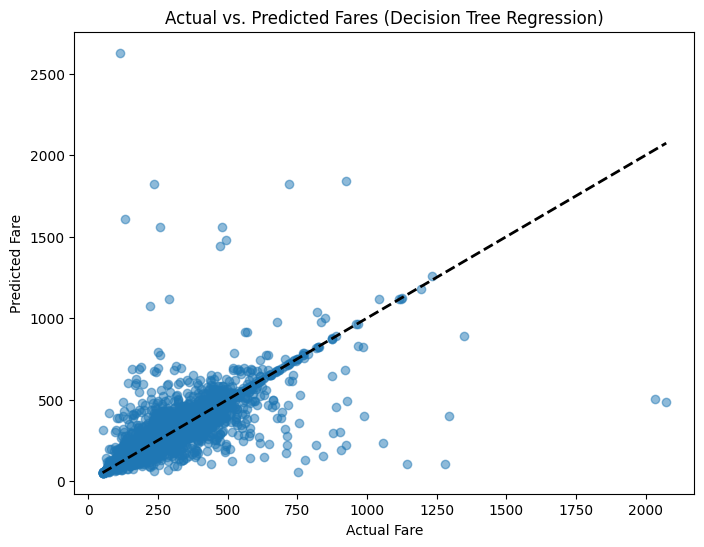

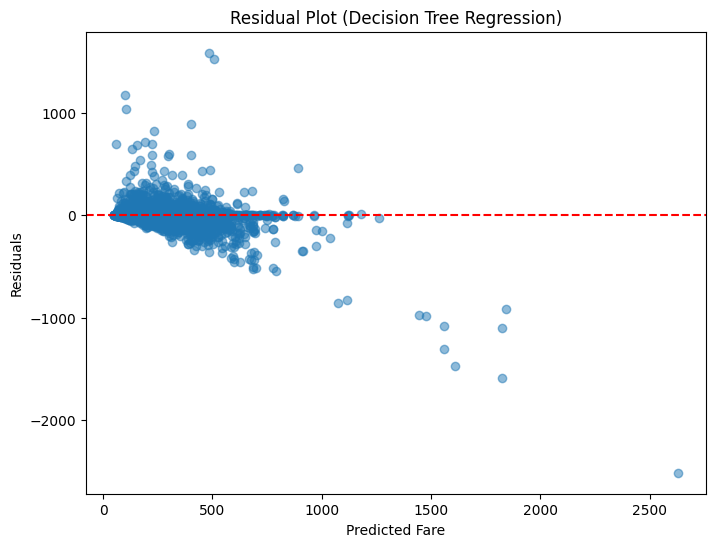

<ipython-input-65-7f1c4be6ceb6>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_dt)


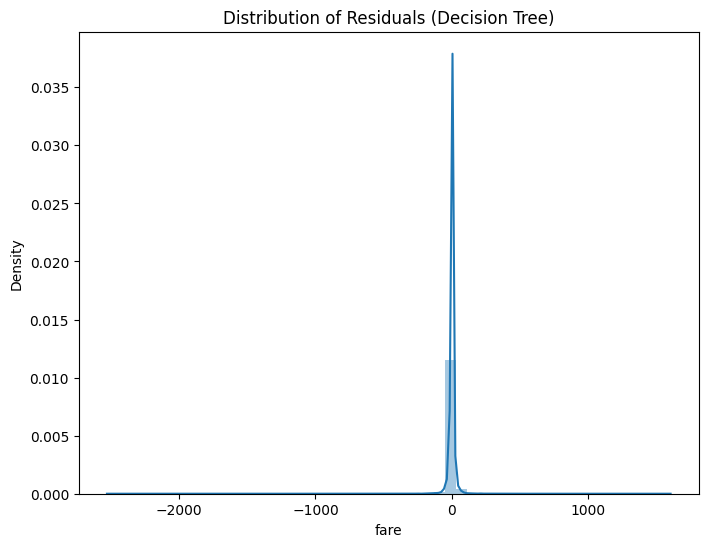

In [ ]:
# Actual vs Predicted values for Decision Tree Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yp_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fares (Decision Tree Regression)')
plt.show()

# Residual plot for Decision Tree Regression
residuals_dt = y_test - yp_dt
plt.figure(figsize=(8, 6))
plt.scatter(yp_dt, residuals_dt, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot (Decision Tree Regression)')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.distplot(residuals_dt)
plt.title("Distribution of Residuals (Decision Tree)")
plt.show()

#RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
st = time.time()
rf_regressor.fit(x_train, y_train)
et = time.time()

In [ ]:
yp_rf = rf_regressor.predict(x_test)

In [ ]:
rf_tt = et - st
mse_rf = mean_squared_error(y_test, yp_rf)
r2_rf = r2_score(y_test, yp_rf)
mae_rf = mean_absolute_error(y_test, yp_rf)
rmse_rf = np.sqrt(mse_rf)

In [ ]:
print('Training time : ', rf_tt)
print('Mean Squared Error (MSE) for Random Forest:', mse_rf)
print('R² Score for Random Forest:', r2_rf)
print('Mean Absolute Error (MAE) for Random Forest:', mae_rf)
print('Root Mean Squared Error (RMSE) for Random Forest:', rmse_rf)

Training time :  281.67841362953186
Mean Squared Error (MSE) for Random Forest: 673.6079930063257
R² Score for Random Forest: 0.8982024092623395
Mean Absolute Error (MAE) for Random Forest: 7.923150877192983
Root Mean Squared Error (RMSE) for Random Forest: 25.95395910080629


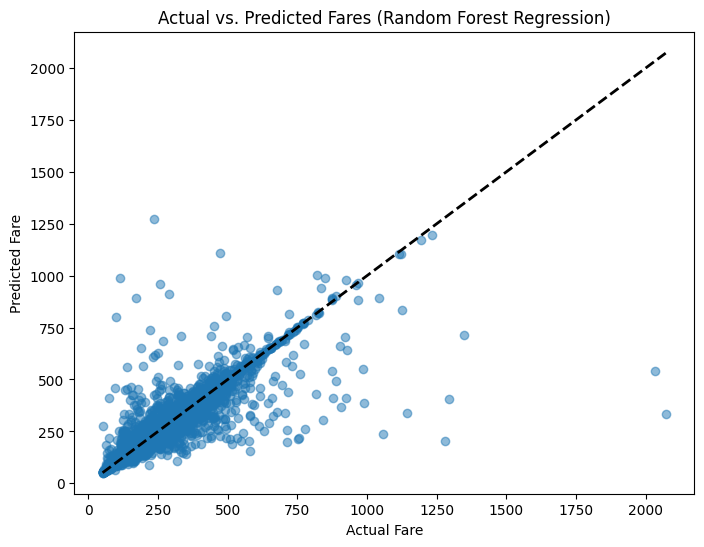

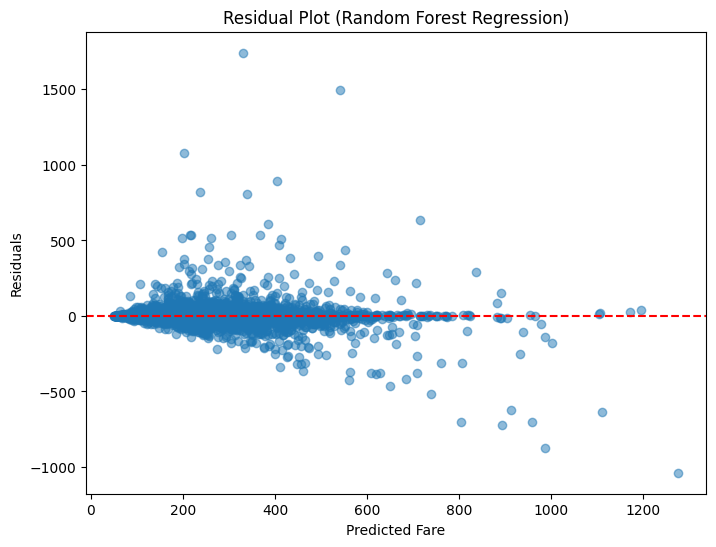

<ipython-input-71-55035a46e609>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_rf)


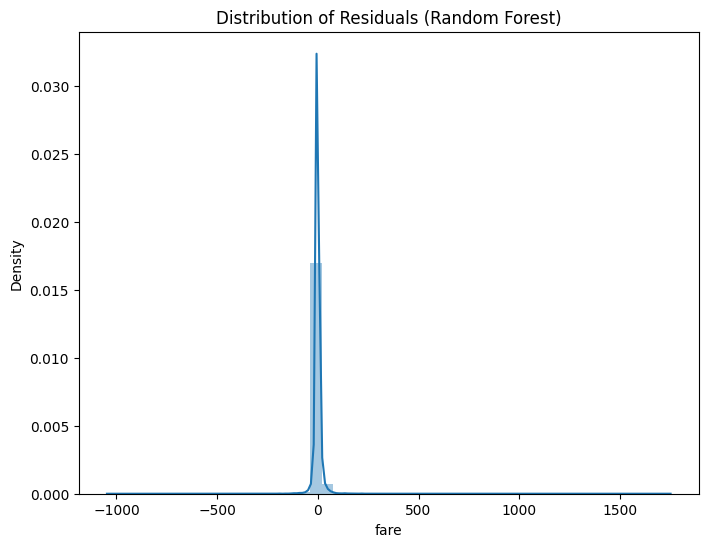

In [ ]:
# Actual vs Predicted values for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yp_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs. Predicted Fares (Random Forest Regression)')
plt.show()

# Residual plot for Random Forest Regression
residuals_rf = y_test - yp_rf
plt.figure(figsize=(8, 6))
plt.scatter(yp_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regression)')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.distplot(residuals_rf)
plt.title("Distribution of Residuals (Random Forest)")
plt.show()

In [ ]:
data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_linear, mse_lasso, mse_ridge, mse_knn, mse_dt, mse_rf],
    'R² Score': [r2_linear, r2_lasso, r2_ridge, r2_knn, r2_dt, r2_rf],
    'MAE': [mae_linear, mae_lasso, mae_ridge, mae_knn, mae_dt, mae_rf],
    'RMSE': [rmse_linear, rmse_lasso, rmse_ridge, rmse_knn, rmse_dt, rmse_rf],
    'Training Time': [ltt, lasso_tt, RR_tt, knn_tt, dt_tt, rf_tt]
}

df = pd.DataFrame(data)

df

,Model,MSE,R² Score,MAE,RMSE,Training Time
0,Linear Regression,855.476490,0.870718,11.927280,29.248530,0.114975
1,Lasso Regression,859.284235,0.870142,12.106027,29.313550,0.160046
2,Ridge Regression,855.476369,0.870718,11.927331,29.248528,0.040176
3,KNN,886.361582,0.866050,13.441944,29.771825,0.649127
4,Decision Tree,1258.951137,0.809744,11.220663,35.481701,4.521314
5,Random Forest,673.607993,0.898202,7.923151,25.953959,281.678414


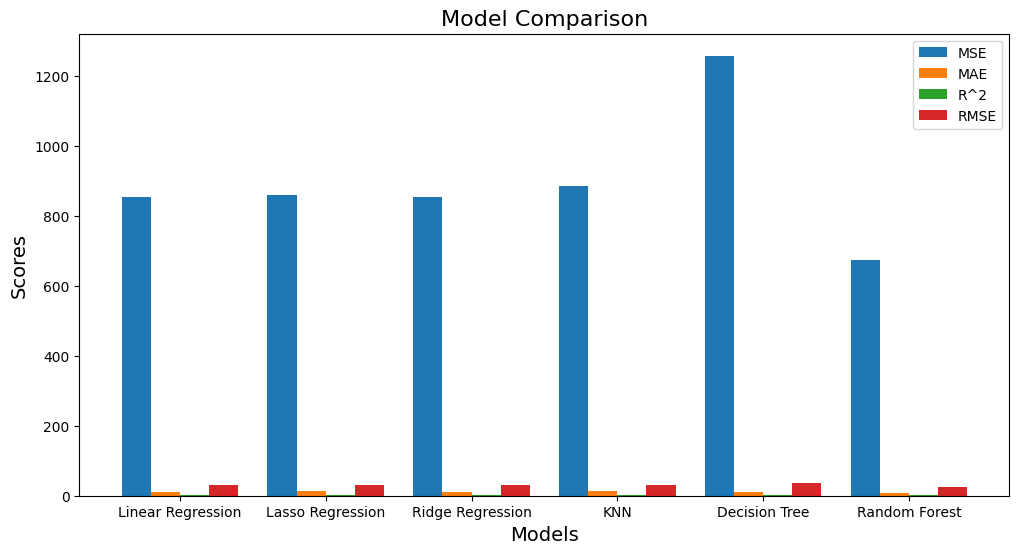

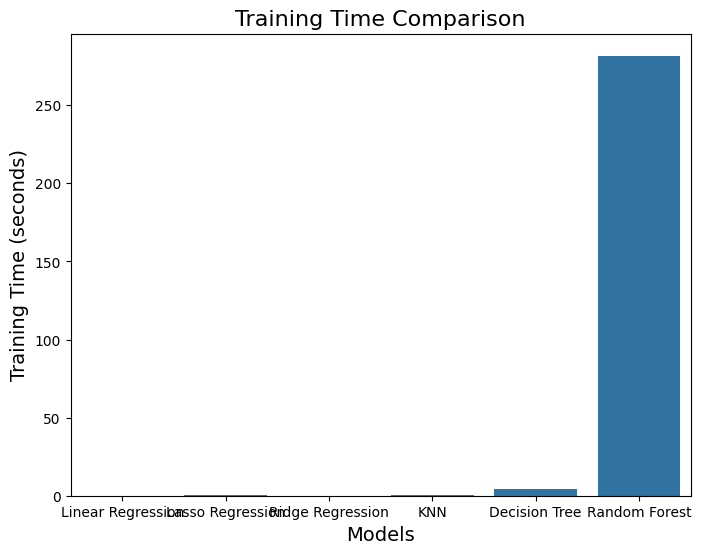

In [ ]:
# prompt: make grpahs from above infrmation

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your DataFrame 'df' is already created as shown in your provided code

# Bar plot for MSE, R², MAE, and RMSE
plt.figure(figsize=(12, 6))
models = df['Model']
mse = df['MSE']
r2 = df['R² Score']
mae = df['MAE']
rmse = df['RMSE']

X_axis = np.arange(len(models))

plt.bar(X_axis - 0.3, mse, 0.2, label = 'MSE')
plt.bar(X_axis -0.1, mae, 0.2, label = 'MAE')
plt.bar(X_axis + 0.1, r2, 0.2, label = 'R^2')
plt.bar(X_axis + 0.3, rmse, 0.2, label = 'RMSE')


plt.xticks(X_axis, models)
plt.xlabel("Models",fontsize=14)
plt.ylabel("Scores",fontsize=14)
plt.title("Model Comparison",fontsize=16)
plt.legend()
plt.show()

# Bar plot for Training Time
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Training Time', data=df)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Training Time (seconds)", fontsize=14)
plt.title("Training Time Comparison", fontsize=16)
plt.show()

#BootStarping

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
RR = Ridge()
las = Lasso()
lr = LinearRegression()

In [ ]:
bootstrap_results = {
    'Model': [],
    'MSE': [],
    'R²': [],
    'MAE': [],
    'RMSE': [],
    'Training Time': []
}

In [ ]:
models = {
    'Random Forest': rf_regressor,
    'Decision Tree': dt_regressor,
    'KNN': knn_regressor,
    'Ridge Regression': RR,
    'Lasso Regression': las,
    'Linear Regression': lr
}

In [ ]:
from sklearn.utils import resample

In [ ]:
n_iterations = 5

for model_name, model in models.items():
    mse_list, r2_list, mae_list, rmse_list, time_list = [], [], [], [], []

    for _ in range(n_iterations):
        # Resample data
        x_boot, y_boot = resample(x_train,y_train)

        # Train model and calculate training time
        start_time = time.time()
        model.fit(x_boot, y_boot)
        end_time = time.time()

        # Predict on test data
        y_pred = model.predict(x_test)

        # Calculate metrics
        mse_list.append(mean_squared_error(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
        r2_list.append(r2_score(y_test, y_pred))
        rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        time_list.append(end_time - start_time)

    # Store average metrics
    bootstrap_results['Model'].append(model_name)
    bootstrap_results['MSE'].append(np.mean(mse_list))
    bootstrap_results['R²'].append(np.mean(r2_list))
    bootstrap_results['MAE'].append(np.mean(mae_list))
    bootstrap_results['RMSE'].append(np.mean(rmse_list))
    bootstrap_results['Training Time'].append(np.mean(time_list))

ValueError: Input X contains NaN.
KNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df = pd.DataFrame(bootstrap_results)

In [ ]:
# 1. Bar plot for MSE, R², MAE, RMSE
plt.figure(figsize=(12, 6))
X_axis = np.arange(len(df['Model']))
plt.bar(X_axis - 0.3, df['MSE'], 0.2, label='MSE')
plt.bar(X_axis - 0.1, df['MAE'], 0.2, label='MAE')
plt.bar(X_axis + 0.1, df['R²'], 0.2, label='R²')
plt.bar(X_axis + 0.3, df['RMSE'], 0.2, label='RMSE')
plt.xticks(X_axis, df['Model'])
plt.xlabel("Models", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.title("Model Comparison (Bootstrapped)", fontsize=16)
plt.legend()
plt.show()

# 2. Bar plot for Training Time
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Training Time', data=df)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Training Time (seconds)", fontsize=14)
plt.title("Training Time Comparison (Bootstrapped)", fontsize=16)
plt.show()

#SVM

In [ ]:
svr = SVR(kernel='linear')
st=time.time()
svr.fit(x_train,y_train)
et=time.time()

In [ ]:
yp_svr=svr.predict(x_test)

In [ ]:
svr_tt=et-st
mse_svr = mean_squared_error(y_test, yp_svr)
r2_svr = r2_score(y_test, yp_svr)
mae_svr = mean_absolute_error(y_test, yp_svr)
rmse_svr = np.sqrt(mse_svr)

print('Training time : ',svr_tt)
print('Mean Squared Error (MSE) for SVR:', mse_svr)
print('R² Score for SVR:', r2_svr)
print('Mean Absolute Error (MAE) for SVR:', mae_svr)
print('Root Mean Squared Error (RMSE) for SVR:', rmse_svr)


#Table comarision of errors

In [ ]:

data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'SVR'],
    'MSE': [mse_linear, mse_lasso, mse_ridge, mse_svr],
    'R² Score': [r2_linear, r2_lasso, r2_ridge, r2_svr],
    'MAE': [mae_linear, mae_lasso, mae_ridge, mae_svr],
    'RMSE': [rmse_linear, rmse_lasso, rmse_ridge, rmse_svr],
    'Training Time':[ltt,lasso_tt,RR_tt,svr_tt]
}

df = pd.DataFrame(data)

df


In [ ]:
df.to_csv('errors.csv',index=False)